In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("jawa tengah.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  314 non-null    datetime64[ns]
 1   Tn       305 non-null    float64       
 2   Tx       310 non-null    float64       
 3   Tavg     310 non-null    float64       
 4   RH_avg   310 non-null    float64       
 5   RR       243 non-null    float64       
 6   ss       310 non-null    float64       
 7   ff_x     312 non-null    float64       
 8   ddd_x    312 non-null    float64       
 9   ff_avg   312 non-null    float64       
 10  ddd_car  312 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 27.1+ KB


<ipython-input-2-3f613b338d64>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,24.2,29.1,10.2,26.6
1,2023-02-01,25.0,31.2,0.4,27.8
2,2023-03-01,25.6,31.0,0.0,27.1
3,2023-04-01,25.2,32.2,0.2,27.8
4,2023-05-01,NaN,32.0,22.3,27.7
...,...,...,...,...,...
309,2023-10-28,26.2,33.7,NaN,29.8
310,2023-10-29,25.8,36.1,0.0,30.0
311,2023-10-30,26.0,34.6,0.0,30.1
312,2023-10-31,26.7,33.2,0.0,29.8


In [4]:
# cek duplikat
df1.duplicated().sum()

9

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates(keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,24.2,29.1,10.2,26.6
1,31,31,2023-01-02,24.9,29.4,26.8,27.1
2,59,60,2023-01-03,23.8,30.6,3.0,26.2
3,90,92,2023-01-04,23.9,32.2,7.2,26.2
4,120,123,2023-01-05,25.4,31.5,21.9,28.0
...,...,...,...,...,...,...,...
300,162,167,2023-12-06,24.6,33.3,NaN,28.8
301,192,198,2023-12-07,24.0,33.4,0.0,27.6
302,223,230,2023-12-08,21.4,30.6,0.0,25.5
303,254,262,2023-12-09,25.0,33.0,0.0,NaN


In [8]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          9
Tx          4
RR         69
Tavg        4
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       2
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

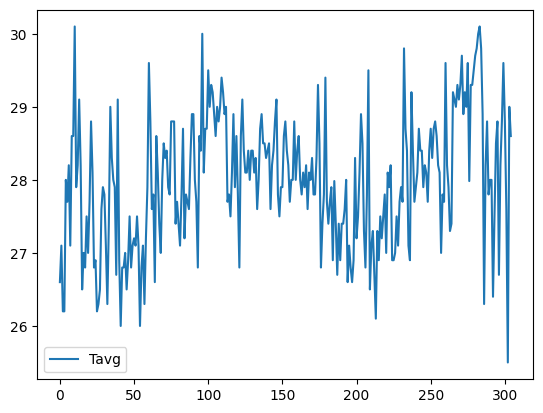

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

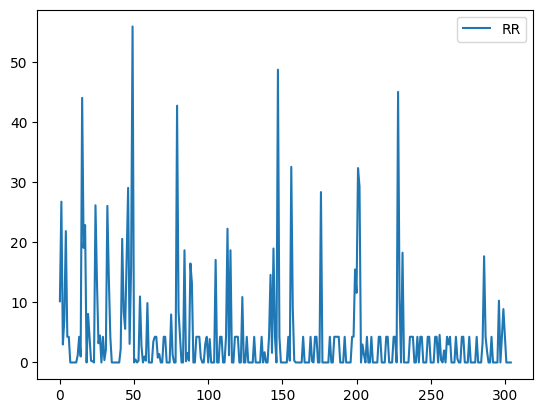

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,24.2,29.1,10.20000,26.6,29.4,27.1,26.80000
1,31,31,2023-01-02,24.9,29.4,26.80000,27.1,30.6,26.2,3.00000
2,59,60,2023-01-03,23.8,30.6,3.00000,26.2,32.2,26.2,7.20000
3,90,92,2023-01-04,23.9,32.2,7.20000,26.2,31.5,28.0,21.90000
4,120,123,2023-01-05,25.4,31.5,21.90000,28.0,32.4,27.7,4.28178
...,...,...,...,...,...,...,...,...,...,...
300,162,167,2023-12-06,24.6,33.3,4.28178,28.8,33.4,27.6,0.00000
301,192,198,2023-12-07,24.0,33.4,0.00000,27.6,30.6,25.5,0.00000
302,223,230,2023-12-08,21.4,30.6,0.00000,25.5,33.0,29.0,0.00000
303,254,262,2023-12-09,25.0,33.0,0.00000,29.0,32.8,28.6,0.00000


In [14]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,10.20000,26.6,27.1,26.80000
1,26.80000,27.1,26.2,3.00000
2,3.00000,26.2,26.2,7.20000
3,7.20000,26.2,28.0,21.90000
4,21.90000,28.0,27.7,4.28178
...,...,...,...,...
300,4.28178,28.8,27.6,0.00000
301,0.00000,27.6,25.5,0.00000
302,0.00000,25.5,29.0,0.00000
303,0.00000,29.0,28.6,0.00000


In [15]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,10.20000,26.6,27.1,26.80000
1,26.80000,27.1,26.2,3.00000
2,3.00000,26.2,26.2,7.20000
3,7.20000,26.2,28.0,21.90000
4,21.90000,28.0,27.7,4.28178
...,...,...,...,...
299,8.90000,29.6,28.8,4.28178
300,4.28178,28.8,27.6,0.00000
301,0.00000,27.6,25.5,0.00000
302,0.00000,25.5,29.0,0.00000


In [16]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,10.20000,26.6,27.1,26.80000,0
1,26.80000,27.1,26.2,3.00000,1
2,3.00000,26.2,26.2,7.20000,2
3,7.20000,26.2,28.0,21.90000,3
4,21.90000,28.0,27.7,4.28178,4
...,...,...,...,...,...
299,8.90000,29.6,28.8,4.28178,299
300,4.28178,28.8,27.6,0.00000,300
301,0.00000,27.6,25.5,0.00000,301
302,0.00000,25.5,29.0,0.00000,302


In [18]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [19]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Indeks,Tavg
243,243,28.4
244,244,28.4
245,245,27.9
246,246,28.2
247,247,28.1
...,...,...
299,299,29.6
300,300,28.8
301,301,27.6
302,302,25.5


In [22]:
#testing
pred1 = lr.predict(X_test)
pred1

array([28.18058174, 28.18094885, 27.93053702, 28.08137148, 28.0315828 ,
       27.83132676, 28.18278437, 28.33361883, 28.13336279, 28.33435304,
       28.38487593, 28.28493146, 28.08467542, 28.03488674, 27.48354019,
       27.88515359, 27.8353649 , 28.78869194, 28.08687804, 27.93677779,
       27.63621017, 27.68673306, 28.58990432, 28.54011564, 28.49032695,
       28.64116142, 28.54121695, 28.64189562, 28.84288587, 28.44200669,
       28.59284115, 28.49289668, 28.7941985 , 27.98396203, 28.64446535,
       28.64483246, 28.74551113, 28.84618981, 28.8967127 , 28.99739137,
       29.04791427, 28.89781401, 28.44677904, 27.1430957 , 28.09642274,
       28.39772456, 27.89653381, 27.99721248, 27.99757959, 27.19545411,
       27.74753486, 28.24945983, 28.40029429, 27.34738989, 28.10009378,
       28.4013956 , 28.803009  , 28.40212981, 27.80062748, 26.74772308,
       28.5035427 ])

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.6993899078530991 0.8030019173671474


In [24]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
243,243,28.4
244,244,28.4
245,245,27.9
246,246,28.2
247,247,28.1
...,...,...
299,299,29.6
300,300,28.8
301,301,27.6
302,302,25.5


In [25]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
243,28.180582
244,28.180949
245,27.930537
246,28.081371
247,28.031583
...,...
299,28.803009
300,28.402130
301,27.800627


In [26]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-26-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,26.6,NaN
1,27.1,NaN
2,26.2,NaN
3,26.2,NaN
4,28.0,NaN
...,...,...
299,29.6,28.803009
300,28.8,28.402130
301,27.6,27.800627
302,25.5,26.747723


<Axes: >

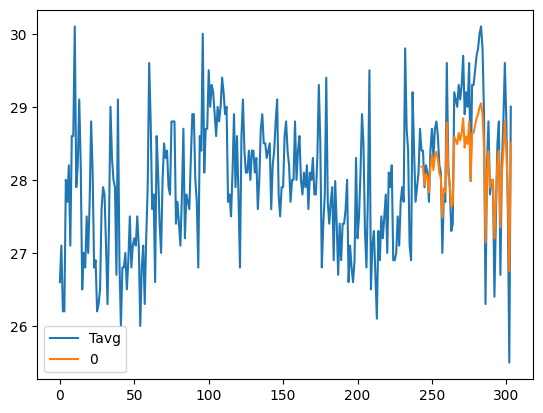

In [27]:
kan.plot()

In [29]:
new_data = [[350, 29.0],[351,29.0],[352,29.0],[353,29.0],[354,29.0],[355,29.0],[356,29.0]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.52079658, 28.52116369, 28.52153079, 28.52189789, 28.522265  ,
       28.5226321 , 28.52299921])

In [30]:
kan.to_json('prediksi_jawa tengah')